Es posible simular el comportamiento de un cardumen de N peces (por ejemplo N=16) con
tres reglas que controlan la velocidad de cada pez dentro del cardumen:

(a) Tender a acercarse al centro del cardumen 

δv1i =(rc−ri)/8 donde rc es el centro del cardumen y ri es la posición del i-ésimo pez.

 

(b) Evitar chocar con los vecinos más cercanos

 δv2i =∑︀ri−rj /|rj−ri|                 sobre j hasta |rj−ri|<d

donde solo se tienen en cuenta los peses que están a una distancia máxima d.




(c) Tender a igular la velocidad media del cardumen 
δ3i =(vc−vi)/8   donde vc es la velocidad media del cardumen y vi es la velocidad del pez i-ésimo.


El cambio de la velocidad del i-ésimo pez será la suma de los cambios de las tres reglas
δvi = δv1i + δv2i + δv3i

A su vez tenemos la restricción que la velocidad de los peces no puede superar una velocidad máxima (∀i, ||vi|| < maxVel, métrica L2), en caso de superarla mantener la dirección actual haciendo v =(v/|v|)* maxVel

Finalmente la evolución de la posición de cada pez se calcula como 

ri(t + δt) = ri(t) + vi(t) × δt

#Consigna:

Armar una clase R2 para modelar el problema en 2D (i.e un objeto de R2 tiene una coordenada x1 y x2); una clase Pez que cuente
con los atributos de posición y velocidad; y una clase cardumen con los atributos privados
maxVel, maxDist (para la regla 2). La forma de utilizar la clase cardumen es:

c = Cardumen()

c.initialize(40, maxVel, maxDist)

for i in range(niter):

c.doStep()

c.print()

donde se inicializa de forma aleatoria la posición dentro del espacio 40x40 con una velocidad
inicial random < maxVel, y print imprime la posicion y velocidad de cada pez.

In [1]:
import time
import matplotlib.animation as ani
import matplotlib.pyplot as plt
import numpy as np

tarda 0.33 s en simular
tarda 14.09 s en animar


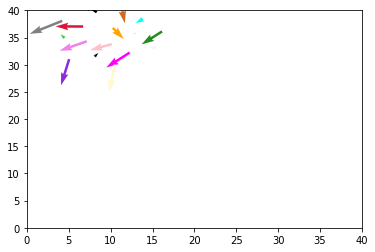

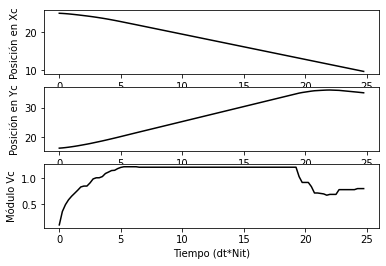

In [3]:


dt = 0.25

class R2:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __add__(self, otro): return R2(self.x + otro.x, self.y + otro.y)

    def __radd__(self, otro):
        if otro == 0:
            return self
        else:
            return self.__add__(self, otro)

    def __sub__(self, otro): return R2(self.x - otro.x, self.y - otro.y)

    def __mul__(self, otro): return R2(self.x * otro, self.y * otro)

    def __truediv__(self, num): return R2(self.x / num, self.y / num)

    def modulo(self): return np.sqrt(((self.x)**2)+((self.y)**2))

    def __str__(self): return "({},{})".format(self.x, self.y)


class Pez():
    def __init__(self, x, y, vx, vy):
        self.pos = R2(x, y)
        self.vel = R2(vx, vy)


class Cardumen():
    def __init__(self, size, max_dist, max_vel, N_peces):
        self.__max_v = max_vel
        self.__max_d = max_dist
        self.N = N_peces
        self.size = size
        self.peces = [Pez(np.random.uniform(0,size), np.random.uniform(0,size),
                          np.random.uniform(0,max_vel) * np.random.uniform(-1,1)/np.sqrt(2)
                          , np.random.uniform(0,max_vel) * np.random.uniform(-1,1)/np.sqrt(2)) for i in range(self.N)]

    def meanR(self):
        return R2((sum([self.peces[i].pos.x for i in range(self.N)]) / self.N), (sum([self.peces[i].pos.y for i in range(self.N)])/self.N) )

    def meanV(self):
        return R2((sum([self.peces[i].vel.x/self.N for i in range(self.N)]) ), (sum([self.peces[i].vel.y / self.N for i in range(self.N)])))

    def v_actualizar(self):
        dv1=[(self.meanR()-self.peces[i].pos)/8 for i in range(self.N)]
        dv3=[(self.meanV()-self.peces[i].vel)/8 for i in range(self.N)]
        dv2 = [R2(0, 0) for i in range(self.N)]
        for i in range(self.N):
            for j in range(self.N):
                aux=self.peces[j].pos-self.peces[i].pos
                if aux.modulo() < self.__max_d and i != j:
                    dv2[i] = dv2[i]+ (self.peces[i].pos - self.peces[j].pos) / aux.modulo()

        dv=[dv1[i]+dv2[i]+dv3[i] for i in range(self.N)]
        for i in range(self.N):
            self.peces[i].vel= self.peces[i].vel + dv[i]
            aux= self.peces[i].vel.modulo()
            if aux > self.__max_v:
                self.peces[i].vel=(self.peces[i].vel * self.__max_v) / aux


        return

    def rebote(self):
        for i in range(self.N):
            if self.peces[i].pos.x < 0 and self.peces[i].vel.x < 0:
                self.peces[i].vel.x = -1 * self.peces[i].vel.x

            elif self.peces[i].pos.x > self.size and self.peces[i].vel.x > 0:
                self.peces[i].vel.x = -1 * self.peces[i].vel.x

            elif self.peces[i].pos.y > self.size and self.peces[i].vel.y > 0:
                self.peces[i].vel.y = -1 * self.peces[i].vel.y

            elif self.peces[i].pos.y < 0 and self.peces[i].vel.y < 0:
                self.peces[i].vel.y = -1 * self.peces[i].vel.y

        return

    def doStep(self):
        self.v_actualizar()
        for i in range(self.N):
            self.peces[i].pos = self.peces[i].pos + (self.peces[i].vel * dt)
        self.rebote()



    def print_gif(self,gif):
        x = [self.peces[i].pos.x for i in range(c.N)]
        y = [self.peces[i].pos.y for i in range(c.N)]
        vx = [self.peces[i].vel.x for i in range(c.N)]
        vy = [self.peces[i].vel.y for i in range(c.N)]
        plt.xlim(0, 40)
        plt.ylim(0, 40)
        gif.append([plt.quiver([x], [y], [vx], [vy],color=['#F0F8FF','#00FFFF','#D2691E','#8A2BE2','k','#FF00FF','violet','pink','k'
            ,'orange','grey','#32CD32','#FFFACD','#228B22','#DC143C','#F0E68C'])])

        return
    def print(self,j,n_estados):

        if j % n_estados == 0:
            plt.xlim(0, 40)
            plt.ylim(0, 40)

            plt.quiver([self.peces[i].pos.x for i in range(c.N)], [self.peces[i].pos.y for i in range(c.N)],
                       [self.peces[i].vel.x for i in range(c.N)],[self.peces[i].vel.y for i in range(c.N)],
                       color=['#F0F8FF', '#00FFFF', '#D2691E', '#8A2BE2', 'k', '#FF00FF', 'violet', 'pink', '#AFEEEE'
                           , 'orange', 'grey', '#32CD32', '#4B0082', '#228B22', '#DC143C', '#F0E68C'])
            plt.title('Estado a tiempo t={}'.format(j*dt))
            plt.show()


c = Cardumen(40, 3, 4, 16)
niter = 100
fig = plt.figure()
gif = []

xc=np.zeros(niter)
yc=np.zeros(niter)
vc=np.zeros(niter)
t=np.zeros(niter)

start = time.time()
for i in range(niter):
    #c.print(i,50)            #Muestra gráficos cada 250 iteraciones
    c.print_gif(gif)        #Descomentar líneas 125, 133,134,135 para generar un video y comentar línea 125
    c.doStep()
#Guarda Valores medios en función del tiempo
    xc[i] = c.meanR().x
    yc[i] = c.meanR().y
    vc[i] = c.meanV().modulo()
    t[i] = i * dt

print("tarda {:.2f} s en simular".format(time.time() - start))
start = time.time()
video = ani.ArtistAnimation(fig, gif, interval=20, blit=True, repeat_delay=1000)
video.save("peces.mp4")
print("tarda {:.2f} s en animar".format(time.time() - start))

#Grafica valores medios en función del tiempo

plt.figure()
ax1 = plt.subplot(311)
ax1.plot(t, xc, color='k')
ax1.set_ylabel('Posición en Xc')
ax1.set_xlabel('Tiempo (dt*Nit)')

ax2 = plt.subplot(312)
ax2.plot(t, yc, color='k')
ax2.set_ylabel('Posición en Yc')
ax2.set_xlabel('Tiempo (dt*Nit)')

ax3 = plt.subplot(313)
ax3.plot(t, vc, color='k')
ax3.set_ylabel('Módulo Vc')
ax3.set_xlabel('Tiempo (dt*Nit)')

plt.show()


